# Traffic Signs Classification Using CNN

**Dataset**

https://www.kaggle.com/flo2607/traffic-signs-classification

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

## **Data Preprocessing**

In [2]:
dim = (64, 64, 3)
target_size = dim[:2]
batch_size = 64
epochs = 25

### Creating the Data set

In [3]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale = 1./255,
                             #shear_range = 0.2,
                             #zoom_range = 0.2,
                             horizontal_flip = True)

In [4]:
dataSet = datagen.flow_from_directory('/content/myData',
                                      target_size = target_size,
                                      class_mode='categorical',
                                      batch_size = 73139,
                                      shuffle=False)

Found 73139 images belonging to 43 classes.


In [5]:
dataSet.class_indices

{'0': 0,
 '1': 1,
 '10': 2,
 '11': 3,
 '12': 4,
 '13': 5,
 '14': 6,
 '15': 7,
 '16': 8,
 '17': 9,
 '18': 10,
 '19': 11,
 '2': 12,
 '20': 13,
 '21': 14,
 '22': 15,
 '23': 16,
 '24': 17,
 '25': 18,
 '26': 19,
 '27': 20,
 '28': 21,
 '29': 22,
 '3': 23,
 '30': 24,
 '31': 25,
 '32': 26,
 '33': 27,
 '34': 28,
 '35': 29,
 '36': 30,
 '37': 31,
 '38': 32,
 '39': 33,
 '4': 34,
 '40': 35,
 '41': 36,
 '42': 37,
 '5': 38,
 '6': 39,
 '7': 40,
 '8': 41,
 '9': 42}

In [6]:
indices = dataSet.class_indices

In [7]:
labels = pd.read_csv('/content/labels.csv').set_index('ClassId')

encoding = {v: labels.loc[int(k), 'Name'] for k, v in dataSet.class_indices.items()}

In [20]:
pd.DataFrame(encoding.values(), encoding.keys())

,0
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,No passing for vechiles over 3.5 metric tons
3,Right-of-way at the next intersection
4,Priority road
5,Yield
6,Stop
7,No vechiles
8,Vechiles over 3.5 metric tons prohibited
9,No entry


In [9]:
X, y = dataSet.next()

In [10]:
X.shape

(73139, 64, 64, 3)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Data Exploration

In [12]:
# Displaying basic information

print('Image Size (Pixels):', target_size)
print('Color Mode:', dataSet.color_mode)
print('Training set:', dataSet.n, 'images')
print('Test set:', dataSet.n, 'images')
print('Classes:', dataSet.num_classes)

Image Size (Pixels): (64, 64)
Color Mode: rgb
Training set: 73139 images
Test set: 73139 images
Classes: 43


### Data Visualization

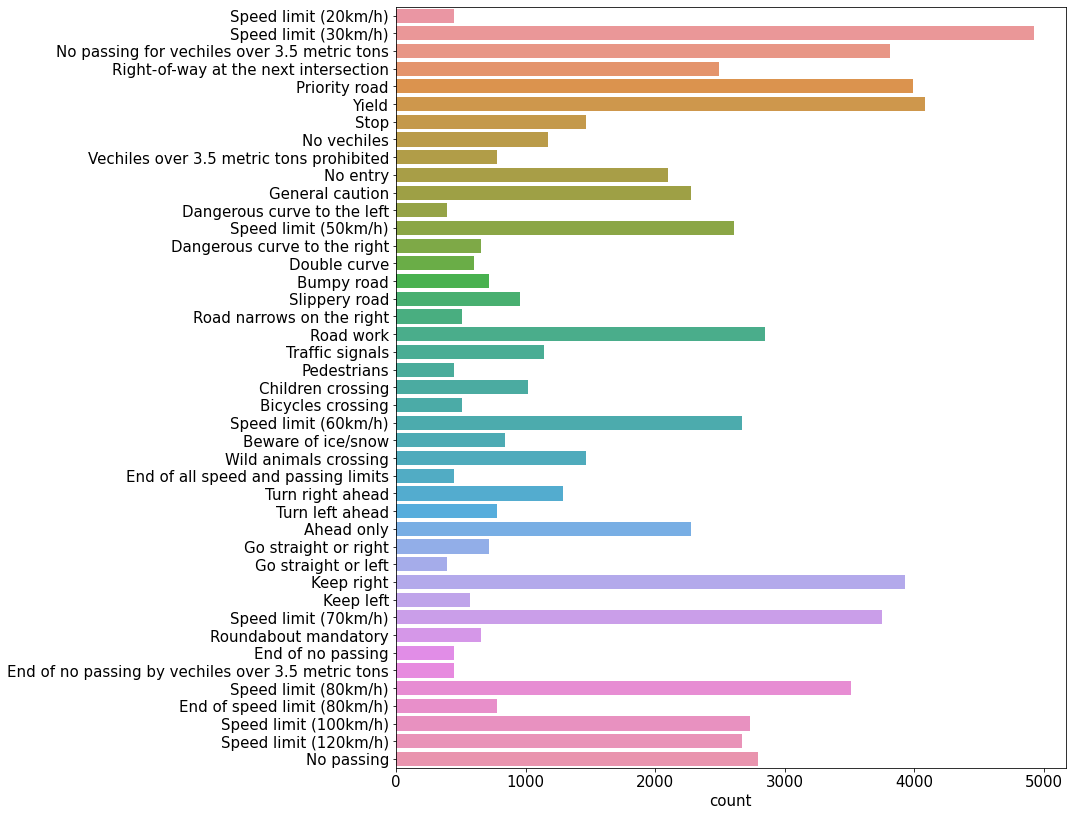

In [24]:
plt.figure(figsize=(12, 14))

font = {'size': 15}
plt.rc('font', **font)
sns.countplot(y = pd.Series(y.argmax(axis=1)).replace(encoding))
plt.show()

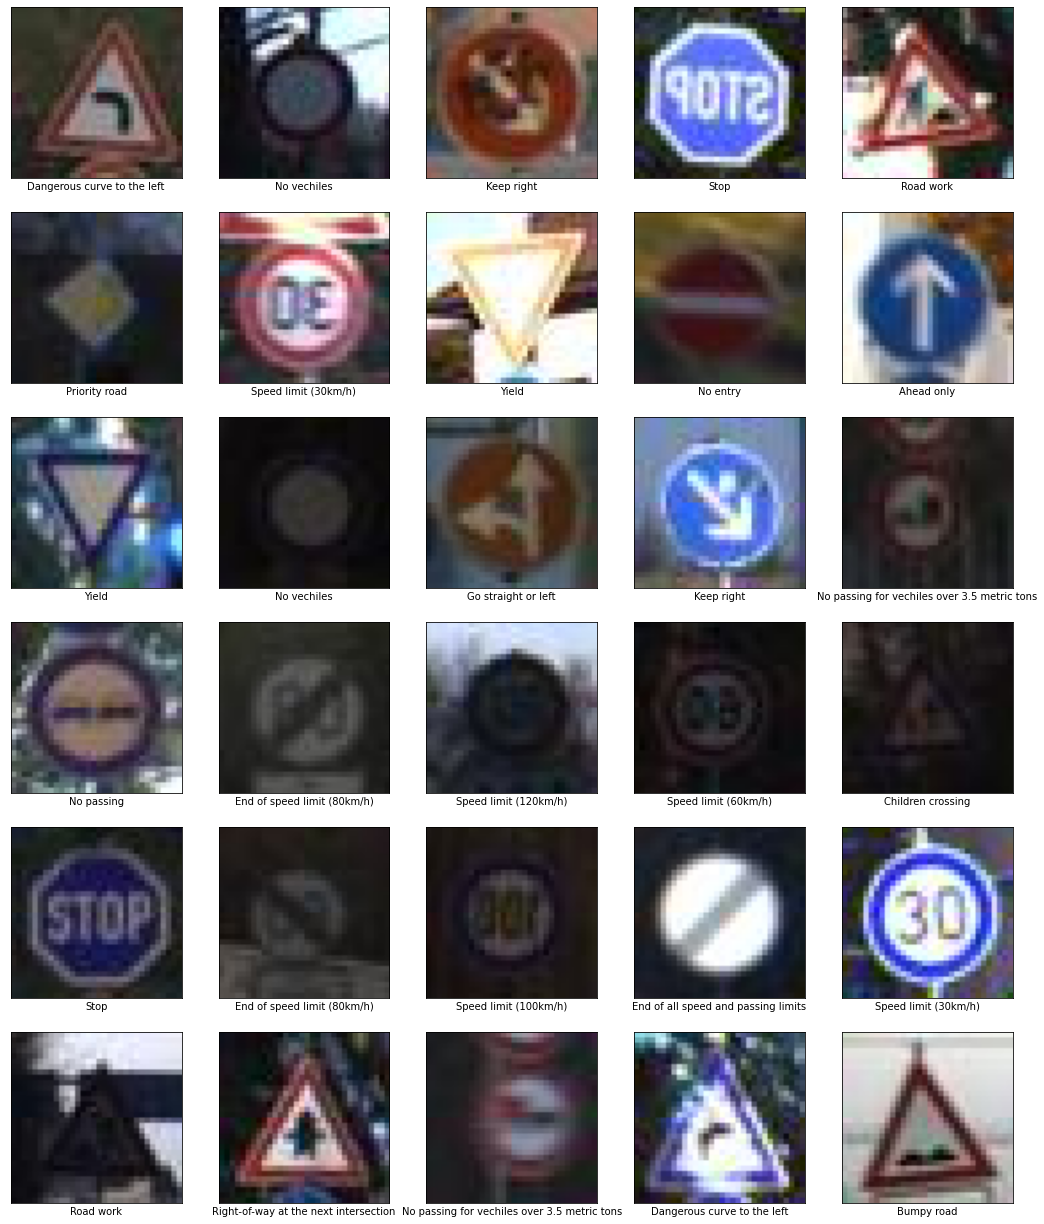

In [18]:
plt.figure(figsize=(18, 22))
font = {'size': 10}
plt.rc('font', **font)

j = 1
for i in list(range(30)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])
    
    idx = y_test.argmax(axis=1)[i]
    plt.xlabel(encoding[idx])
    plt.imshow(X_test[i])

    j += 1
plt.show()

## Building the CNN

### Initialising the CNN

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Dropout

In [26]:
cnn = Sequential()

### Convolution and Pooling

In [27]:
cnn.add(Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=dim))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=128, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

cnn.add(Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))
cnn.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Flattening

In [28]:
cnn.add(Flatten())

### Full Connection

In [29]:
cnn.add(Dense(units=256, activation='relu'))
cnn.add(Dropout(0.5))

### Output Layer

In [30]:
cnn.add(Dense(units=dataSet.num_classes, activation='softmax'))

## Training the CNN

### Compiling the CNN

In [31]:
cnn.compile(optimizer = 'adam', 
            loss = 'categorical_crossentropy', 
            metrics = ['accuracy'])

In [32]:
# Neural Network summary

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

### Training the CNN on the Training set and evaluating it on the Test set

In [33]:
history = cnn.fit(X_train, y_train,
                  validation_data = (X_test, y_test),
                  batch_size = batch_size,
                  epochs = epochs)

Epoch 1/25
915/915 [==============================] - 11s 12ms/step - loss: 1.5821 - accuracy: 0.5462 - val_loss: 0.2740 - val_accuracy: 0.9152
Epoch 2/25
915/915 [==============================] - 11s 12ms/step - loss: 0.2757 - accuracy: 0.9097 - val_loss: 0.1230 - val_accuracy: 0.9614
Epoch 3/25
915/915 [==============================] - 11s 12ms/step - loss: 0.1356 - accuracy: 0.9560 - val_loss: 0.0679 - val_accuracy: 0.9793
Epoch 4/25
915/915 [==============================] - 11s 12ms/step - loss: 0.0906 - accuracy: 0.9716 - val_loss: 0.0410 - val_accuracy: 0.9874
Epoch 5/25
915/915 [==============================] - 11s 12ms/step - loss: 0.0694 - accuracy: 0.9780 - val_loss: 0.0503 - val_accuracy: 0.9861
Epoch 6/25
915/915 [==============================] - 11s 12ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0297 - val_accuracy: 0.9910
Epoch 7/25
915/915 [==============================] - 11s 12ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0423 - val_accuracy:

### Model Evaluation

In [34]:
def report(y_test, y_pred):
    from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
    import seaborn as sns

    cm = confusion_matrix(y_test, y_pred)
    print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')

    plt.figure(figsize=(25, 20))
    sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt = 'd', annot_kws={"size": 10}).set_title('Confusion Matrix')
    plt.show()

In [35]:
# Predicting the Test set results

y_pred = cnn.predict_classes(X_test, verbose=1) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
458/458 [==============================] - 1s 3ms/step


Accuracy:	0.995009570686355


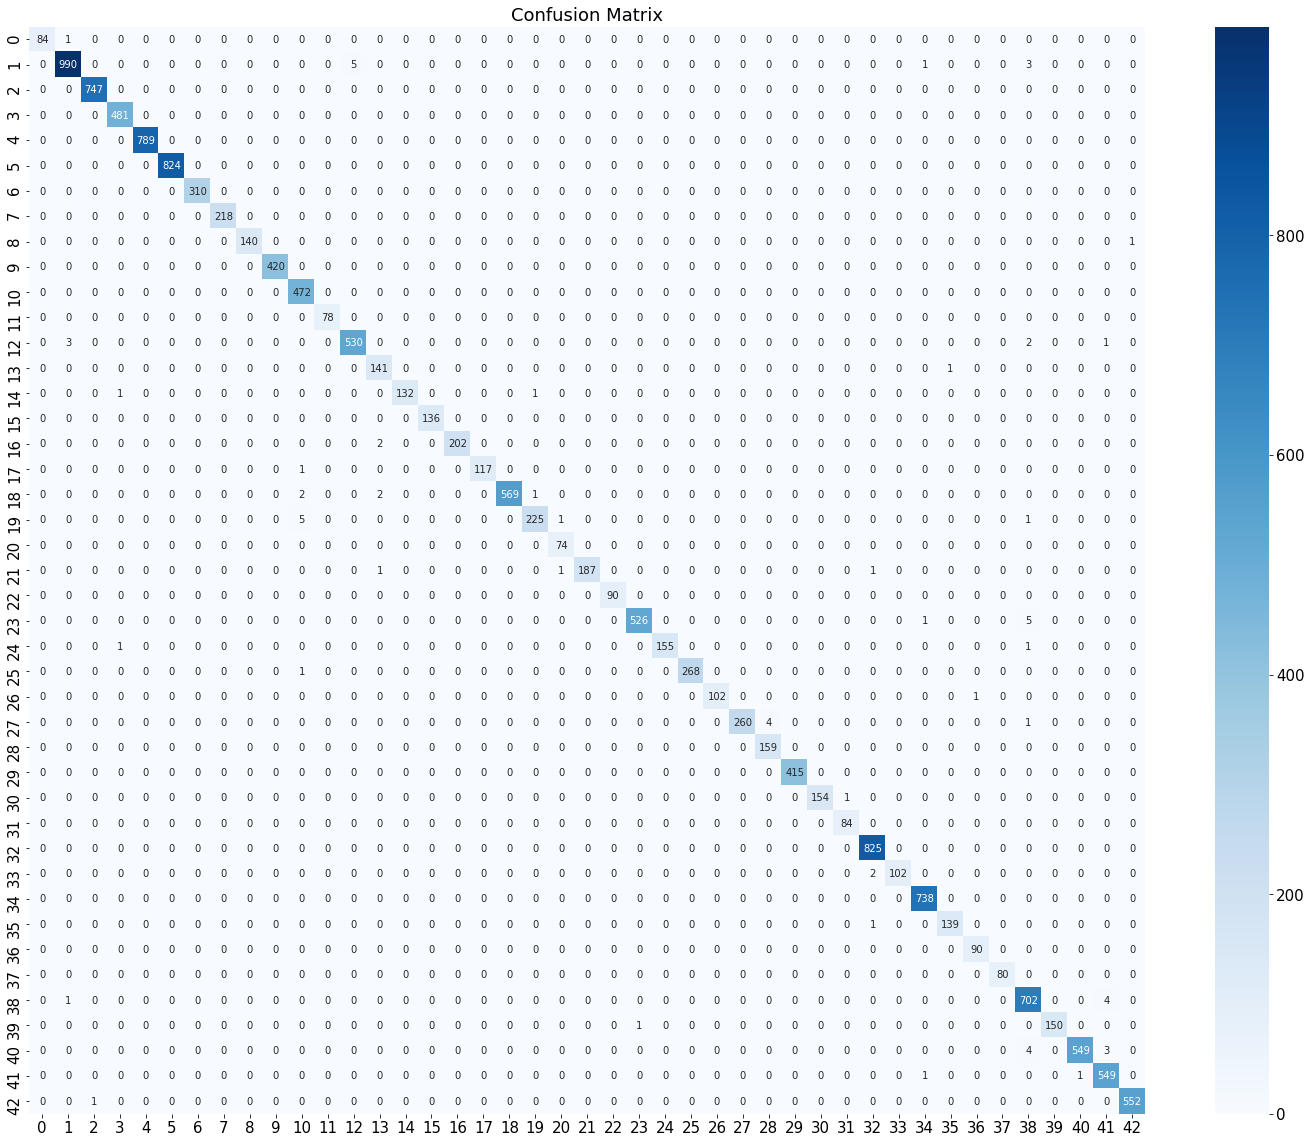

In [36]:
report(y_test.argmax(axis=1), y_pred)

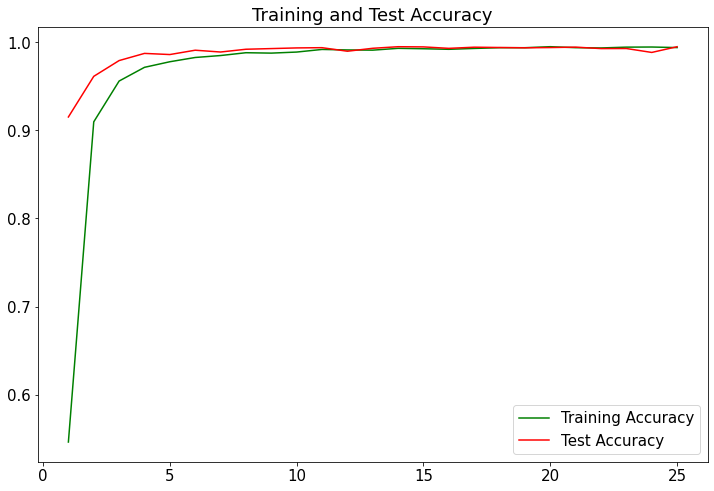

In [37]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         accuracy, 
         color = 'green',
         label = "Training Accuracy")
plt.plot(np.arange(1, epochs+1), 
         val_accuracy, 
         color = 'red',
         label = "Test Accuracy")
plt.legend()
plt.title("Training and Test Accuracy")
plt.show()

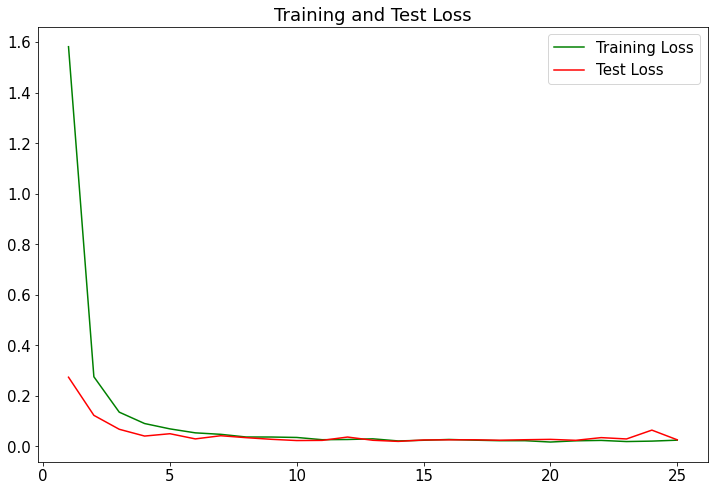

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, epochs+1), 
         loss, 
         color = 'green',
         label = "Training Loss")
plt.plot(np.arange(1, epochs+1), 
         val_loss, 
         color = 'red',
         label = "Test Loss")
plt.legend()
plt.title("Training and Test Loss")
plt.show()

### More Testing

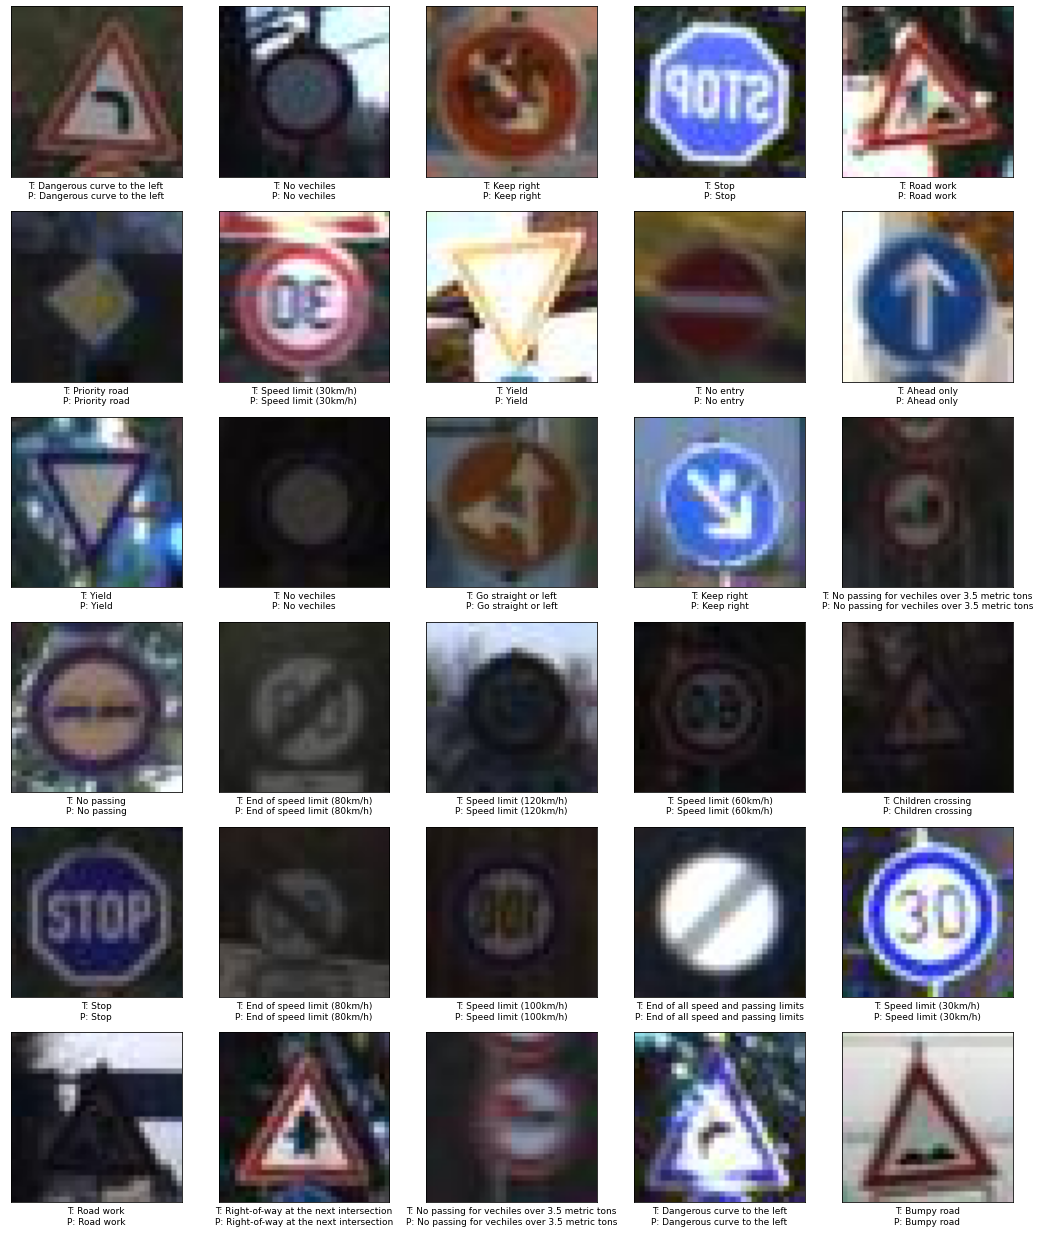

In [44]:
plt.figure(figsize=(18, 22))
font = {'size': 9}
plt.rc('font', **font)

j = 1
for i in list(range(30)):
    plt.subplot(6, 5, j)
    plt.xticks([])
    plt.yticks([])
    
    idx = y_test.argmax(axis=1)[i]
    plt.xlabel('T: ' + str(encoding[idx]) + '\nP: ' + str(encoding[y_pred[i]]))
    plt.imshow(X_test[i])

    j += 1
plt.show()

In [46]:
# Saving the model
cnn.save('model.h5')